In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
%config IPCompleter.greedy=True

# a, b

In [15]:
glass = pd.read_csv('glass.csv').drop('Id', axis=1)
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [16]:
X = glass.drop('Type', axis=1)
y = glass.Type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [17]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [18]:
cv = 5
metrics = ['euclidean', 'manhattan', 'chebyshev']
n_neighbors = range(1, (glass.shape[0] - math.ceil(glass.shape[0] / cv) - 2))

In [19]:
errors = np.zeros(len(n_neighbors))
for n in n_neighbors:
    knc = KNeighborsClassifier(n_neighbors=n)
    knc.fit(X_train, y_train)
    errors[n-n_neighbors.start] += 1 - knc.score(X_test, y_test)

No handles with labels found to put in legend.


Text(0, 0.5, '1 - score')

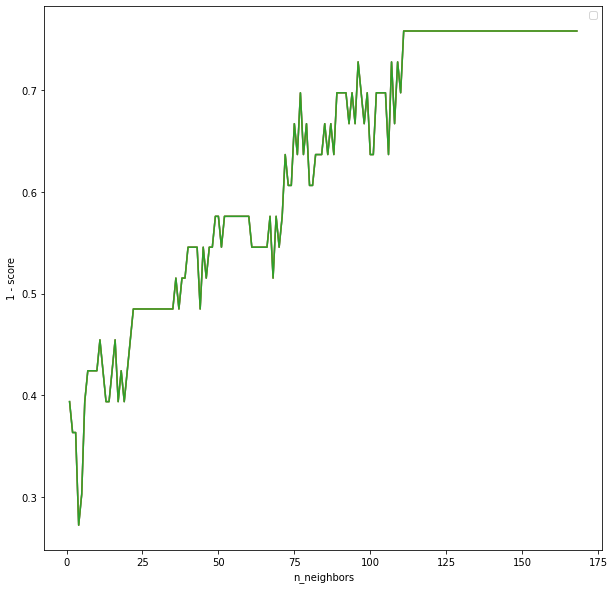

In [20]:
plt.figure(figsize=(10,10))
for i in range(0, len(metrics)):
    plt.plot(n_neighbors, errors[:])
plt.legend(loc='best')
plt.xlabel('n_neighbors')
plt.ylabel('1 - score')

# c

In [21]:
X_test = pd.DataFrame(data={'RI': [1.516], 'Na': [11.7], 'Mg': [1.01], 
                            'Al': [1.19], 'Si': [72.59], 'K': [0.43], 
                            'Ca': [11.44], 'Ba': [0.02], 'Fe': [0.1]})

In [22]:
X_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.516,11.7,1.01,1.19,72.59,0.43,11.44,0.02,0.1


In [23]:
knc = KNeighborsClassifier()
parameters = {'n_neighbors': n_neighbors, 'metric': metrics}
grid_search_cv_knc = GridSearchCV(knc, parameters, cv=5)

In [24]:
grid_search_cv_knc.fit(X, y)
grid_search_cv_knc.best_params_

{'metric': 'euclidean', 'n_neighbors': 1}

In [27]:
grid_search_cv_knc.best_estimator_.predict(pd.DataFrame(data={'RI': [1.516], 'Na': [11.7], 'Mg': [1.01], 
                            'Al': [1.19], 'Si': [72.59], 'K': [0.43], 
                            'Ca': [11.44], 'Ba': [0.02], 'Fe': [0.1]}))[0]

5

In [26]:
grid_search_cv_knc.best_score_

0.640531561461794